 <h1>  <center> Indian Cuisine EDA </center> </h1> 

<center><img src='https://curlytales.com/wp-content/uploads/2019/04/Ardor-1.jpg'/></center>


>Image Courtsey: [Curly Tales](https://curlytales.com/united-india-thali-ardor-2-1-delhi/)

<p style='font-size:16px'>Indian cuisine is known worldwide for its wide variety of dishes. This variety is a direct result of the diversity in soil, climate, culture, ethnic groups, and occupations. In this notebook, we will look at a small subset of Indian cuisine and explore it to find any interesting observations.</p>

Dataset by: [Neha Prabhavalkar](https://www.kaggle.com/nehaprabhavalkar)


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
df = pd.read_csv('../input/indian-food-101/indian_food.csv')



In [2]:
print(df.shape)
df.head()

(255, 9)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


The first thing we notice is that the dataset has 255 rows, which would mean that it has information about 255 different dishes. Furthermore, there are 9 columns associated with each row. 

We will look into the type of values in specific columns later.


Let us first get going with the standard data cleaning tasks.

In [3]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Seems like region is the only column having a null value in the whole dataset and that too, having only a single instance. Though still it is generally a good idea to look at what values each column holds, especially categorical columns. 

Let us look at the state column first.

In [4]:
df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

All the values seem standard except '-1'. It seems like there is some missing data other than null values!

In [5]:
df.loc[df['state']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


There are some states and regions which have missing values. Now, it is possible to look up every single dish on a search engine and try to find out its origin, but that seems to be tedious work and even then the result might end up being highly controversial! Instead, let's mark all the states as 'Unknown' to have a seperate category of dishes whose state of origin is not known.

In [6]:
df['state']=df['state'].replace('-1',"Unknown")

Let us look at other columns now.

In [7]:
df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [8]:
df.loc[df['flavor_profile']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,-1,main course,Maharashtra,West
104,Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,-1,main course,Punjab,North
116,Rongi,"Garam masala powder, tomato, kasuri methi, cin...",vegetarian,10,30,-1,main course,Punjab,North
131,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,-1,snack,Kerala,South
145,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",vegetarian,10,25,-1,main course,Unknown,South
146,Paniyaram,"Yogurt, ginger, curry leaves, baking soda, gre...",vegetarian,10,20,-1,main course,Tamil Nadu,South
150,Paruppu sadam,"Arhar dal, sambar powder, tomato, curry leaves...",vegetarian,10,20,-1,main course,Tamil Nadu,South
153,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",vegetarian,10,20,-1,main course,Tamil Nadu,South
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120,60,-1,main course,Karnataka,South


The flavour of some dishes seems to be missing as well. Here, I have chosen to fill in the flavour by myself. Some flavours I knew by myself, while for others I have looked the dishes up on google or tried to guess the flavour with the help of the ingredients. It is possible that some values might not be accurate, but I felt like this approach would have a low chance of inaccuracy and the required effort was not too much either.

In [9]:
df.loc[df['name']=='Chapati', 'flavor_profile'] = df.loc[df['name']=='Chapati', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Naan', 'flavor_profile'] = df.loc[df['name']=='Naan', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Rongi', 'flavor_profile'] = df.loc[df['name']=='Rongi', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Dahi vada', 'flavor_profile'] = df.loc[df['name']=='Dahi vada', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Kanji', 'flavor_profile'] = df.loc[df['name']=='Kanji', 'flavor_profile'].replace('-1','sour')
df.loc[df['name']=='Pachadi', 'flavor_profile'] = df.loc[df['name']=='Pachadi', 'flavor_profile'].replace('-1','sweet')
df.loc[df['name']=='Paniyaram', 'flavor_profile'] = df.loc[df['name']=='Paniyaram', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Paruppu sadam', 'flavor_profile'] = df.loc[df['name']=='Paruppu sadam', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Puli sadam', 'flavor_profile'] = df.loc[df['name']=='Puli sadam', 'flavor_profile'].replace('-1','sour')
df.loc[df['name']=='Puttu', 'flavor_profile'] = df.loc[df['name']=='Puttu', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Sandige', 'flavor_profile'] = df.loc[df['name']=='Sandige', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Sevai', 'flavor_profile'] = df.loc[df['name']=='Sevai', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Thayir sadam', 'flavor_profile'] = df.loc[df['name']=='Thayir sadam', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Theeyal', 'flavor_profile'] = df.loc[df['name']=='Theeyal', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Bhakri', 'flavor_profile'] = df.loc[df['name']=='Bhakri', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Copra paak', 'flavor_profile'] = df.loc[df['name']=='Copra paak', 'flavor_profile'].replace('-1','sweet')
df.loc[df['name']=='Dalithoy', 'flavor_profile'] = df.loc[df['name']=='Dalithoy', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Kansar', 'flavor_profile'] = df.loc[df['name']=='Kansar', 'flavor_profile'].replace('-1','sweet')
df.loc[df['name']=='Farsi Puri', 'flavor_profile'] = df.loc[df['name']=='Farsi Puri', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Khar', 'flavor_profile'] = df.loc[df['name']=='Khar', 'flavor_profile'].replace('-1','sweet')
df.loc[df['name']=='Luchi', 'flavor_profile'] = df.loc[df['name']=='Luchi', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Bengena Pitika', 'flavor_profile'] = df.loc[df['name']=='Bengena Pitika', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Bilahi Maas', 'flavor_profile'] = df.loc[df['name']=='Bilahi Maas', 'flavor_profile'].replace('-1','sour')
df.loc[df['name']=='Black rice', 'flavor_profile'] = df.loc[df['name']=='Black rice', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Brown Rice', 'flavor_profile'] = df.loc[df['name']=='Brown Rice', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Chingri Bhape', 'flavor_profile'] = df.loc[df['name']=='Chingri Bhape', 'flavor_profile'].replace('-1','spicy')
df.loc[df['name']=='Pakhala', 'flavor_profile'] = df.loc[df['name']=='Pakhala', 'flavor_profile'].replace('-1','plain')
df.loc[df['name']=='Pani Pitha', 'flavor_profile'] = df.loc[df['name']=='Pani Pitha', 'flavor_profile'].replace('-1','sweet')
df.loc[df['name']=='Red Rice', 'flavor_profile'] = df.loc[df['name']=='Red Rice', 'flavor_profile'].replace('-1','plain')







In [10]:
df.loc[df['flavor_profile']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


Great! We seem to have dealt with the problem of missing flavours as well. Now let's move on with the other columns.

In [11]:
df.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

In [12]:
df.loc[df['region']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Unknown,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Unknown,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,Unknown,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,Unknown,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,Unknown,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,Unknown,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,Unknown,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,Unknown,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,Unknown,-1
117,Samosa,"Potatoes, green peas, garam masala, ginger, dough",vegetarian,30,30,spicy,snack,Unknown,-1


In [13]:
df['region']=df['region'].replace('-1',"Unknown")

We did the same thing for region as we did with states. However, there is a null value present in the region column which we haven't dealt with yet.

In [14]:
df.fillna(value= '-1', inplace = True)


In [15]:
df.loc[df['region']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,-1


This one is a peculiar case. The region for Panjeeri seems to be missing but the state is already present. So all we have to do here is look at what region 'Uttar Pradesh' comes under and fill in the region accordingly.

In [16]:
df.loc[df['state']=='Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,-1


In [17]:
df.loc[df['name']=='Panjeeri','region'] = df.loc[df['name']=='Panjeeri','region'].replace('-1','North')

As Uttar Pradesh comes in the north region, we filled the missing instance with 'North'. Now moving on...

In [18]:
df.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [19]:
df.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [20]:
df.cook_time.value_counts()

 30     59
 20     42
-1      28
 40     27
 60     22
 45     15
 25     13
 50     10
 35      9
 10      7
 90      7
 15      5
 5       3
 120     3
 2       1
 6       1
 55      1
 75      1
 720     1
Name: cook_time, dtype: int64

In [21]:
df.prep_time.value_counts()

 10     98
 20     40
-1      30
 15     22
 5      16
 30     12
 25      5
 45      5
 120     5
 240     4
 360     3
 40      3
 180     2
 60      2
 80      1
 70      1
 150     1
 35      1
 480     1
 495     1
 12      1
 500     1
Name: prep_time, dtype: int64

prep_time and cook_time also has some values set to -1. This data can also be filled in with some research. However, let us leave that as is for now.

In [22]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


Hooray! we are done with the data cleaning processes. Let us now start with the data exploration!

**Let us look at what states have the most weightage in the dataset**

In [23]:
df.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
Unknown            24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Madhya Pradesh      2
Manipur             2
NCT of Delhi        1
Chhattisgarh        1
Uttarakhand         1
Tripura             1
Haryana             1
Nagaland            1
Name: state, dtype: int64

Here we find out that Gujarat, Punjab, Maharashtra, West Bengal and Assam combined make up almost half the dataset. This might affect some outcomes in our future explorations so we should always keep this in our minds.

India is pretty famous for having a huge variety of vegetarian dishes. **Let us compare the number of vegetarian and non-vegetarian dishes**

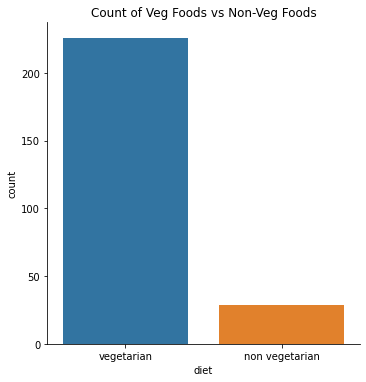

In [24]:
plot = sns.catplot(x='diet', kind='count', data=df)
plot.set(title='Count of Veg Foods vs Non-Veg Foods')
plt.show()

While it makes sense for the vegetarian dish variety to be big, there seems to be a bigger-than-expected disparity here. To explain this, let us assume that the top states that account for majority of the dataset entries have a mostly vegetarian diet (according to the dataset at least).

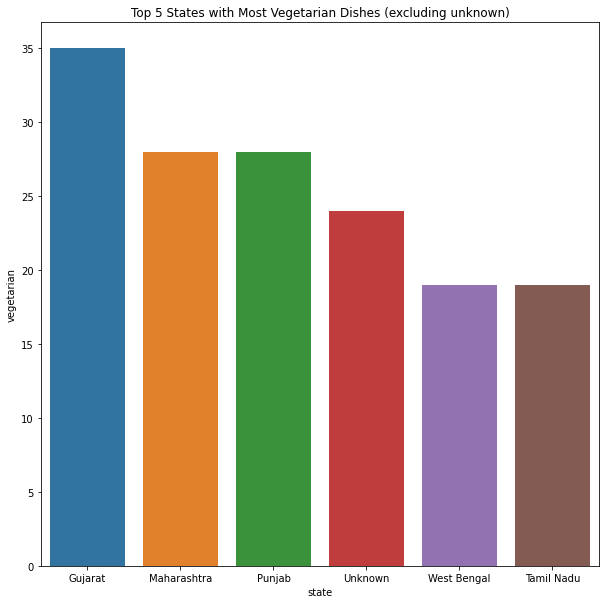

In [25]:
temp = pd.crosstab(df['state'],df['diet'])
veg_states_data = temp.vegetarian
nonveg_states_data = temp['non vegetarian']
top_five_veg = veg_states_data.sort_values(ascending=False).head(6)
top_five_nonveg = nonveg_states_data.sort_values(ascending=False).head()


plt.figure(figsize=(10,10))
plot = sns.barplot(x=top_five_veg.keys(), y=top_five_veg)
plot.set(title='Top 5 States with Most Vegetarian Dishes (excluding unknown)')
plt.show()

It can be seen clearly that the top contributers to the number of dishes in general are also the top contributers to the list of vegetarian dishes. So, it seems like our assumption was correct.

Let us also look at the **top 5 states with the most non vegetarian dishes**.

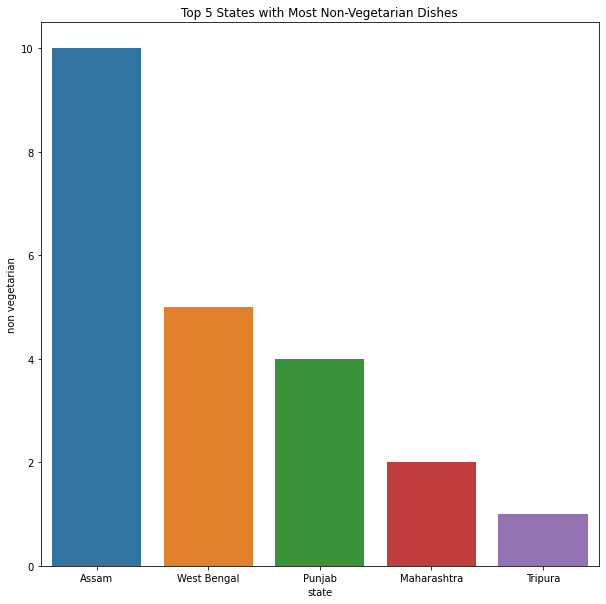

In [26]:
plt.figure(figsize=(10,10))

plot = sns.barplot(x=top_five_nonveg.keys(), y=top_five_nonveg)
plot.set(title='Top 5 States with Most Non-Vegetarian Dishes')
plt.show()

Assam seems to be a clear winner here, followed by West Bengal. It is also worth noting that Tripura and Assam both are in the top 5 list, both of which belong to the North-East part of India. Maybe if we look at the **vegetarian and non-vegetarian comparison from a regional point of view**, we will get another perspective of this comparison.

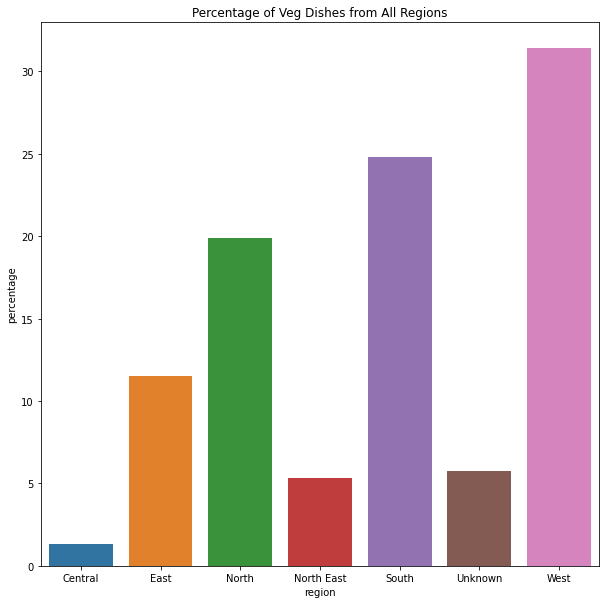

In [27]:
temp = pd.crosstab(df['region'],df['diet'])
veg_region_df = pd.DataFrame(temp.vegetarian)
veg_region_df['percentage']=round((veg_region_df.vegetarian/veg_region_df.vegetarian.sum())*100,2)
nonveg_region_df = pd.DataFrame(temp['non vegetarian'])
nonveg_region_df['percentage']=round((nonveg_region_df['non vegetarian']/nonveg_region_df['non vegetarian'].sum())*100,2)


plt.figure(figsize=(10,10))
plot = sns.barplot(x=veg_region_df.index, y=veg_region_df.percentage)
plot.set(title='Percentage of Veg Dishes from All Regions')
plt.show()

The North, South, and West regions account for almost 80% of the total vegetarian dishes!

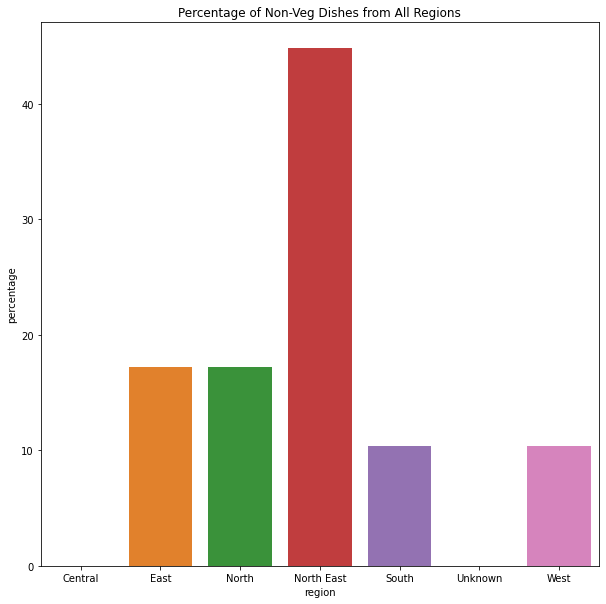

In [28]:
plt.figure(figsize=(10,10))
plot = sns.barplot(x=nonveg_region_df.index, y=nonveg_region_df.percentage)
plot.set(title='Percentage of Non-Veg Dishes from All Regions')
plt.show()

The North-East region contributes to almost 50% of the total non-veg dishes in the dataset! 

Now, let us look at the **preperation time of veg and non-veg dishes**.

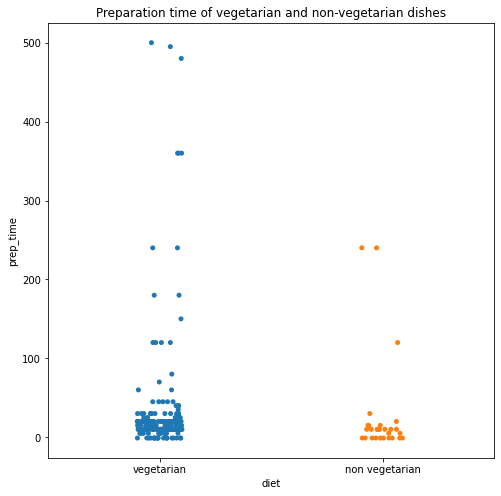

In [29]:
plt.figure(figsize=(8,8))
plot = sns.stripplot(data=df, x='diet', y='prep_time')
plot.set(title='Preparation time of vegetarian and non-vegetarian dishes')
plt.show()

It seems like both the dishes have around the same preparation time. Although, there are a lot of outliers in vegetarian dishes, it can be said that the number of outliers could have been comparable had the list of non-veg dishes been a little greater. Maybe it's better to compare the preparation time of food items on other parameters such as 'course'.

Similary, let us plot the **cooking time of veg and non-veg dishes**.

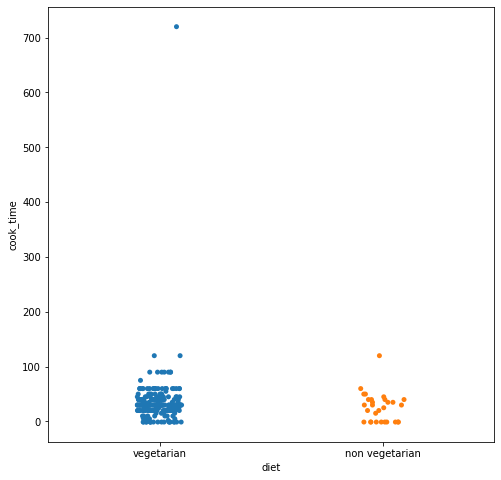

In [30]:
plt.figure(figsize=(8,8))
sns.stripplot(data=df, x='diet', y='cook_time')
plot.set(title='Cooking time of vegetarian and non-vegetarian dishes')
plt.show()

Both the categories seem to be in the same range. However, there is a particular case in vegetarian dishes which shows abnormally high cooking time. Let us look at which food item this is.

In [31]:
df.loc[df['cook_time'] == df['cook_time'].max()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West


Moving on, **let us compare the flavours of veg and non-veg dishes**.

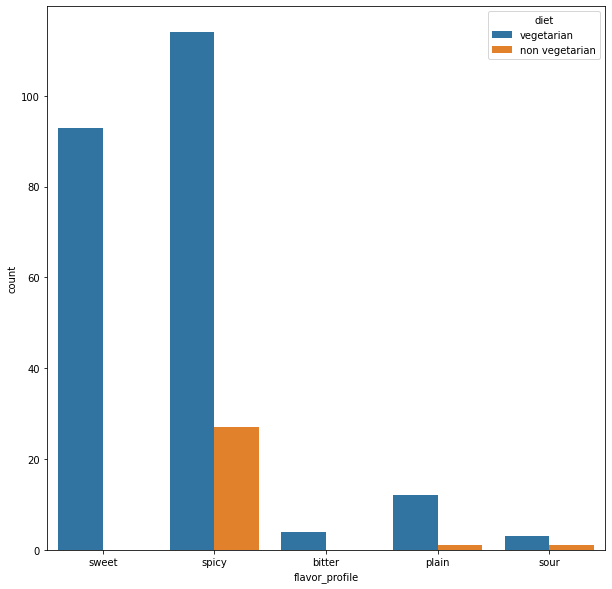

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['flavor_profile'],hue=df['diet'] )
plot.set(title='Number of dishes of a particular diet based on flavour')
plt.show()

Surprising to nobody, spicy food seems to be leading in both categories.

Now that we're talking about flavours, let's find out **the leading flavours of every single state and plot them on the map of India**.

In [33]:
flavors_of_state = pd.crosstab(df['state'],df['flavor_profile'])
flavors_of_state['max'] = flavors_of_state.idxmax(axis=1)
flavors_of_state.drop(columns=['bitter','sweet','plain','sour','spicy'], inplace=True)
flavors_of_state

flavor_profile,max
state,
Andhra Pradesh,sweet
Assam,spicy
Bihar,spicy
Chhattisgarh,spicy
Goa,sweet
Gujarat,spicy
Haryana,spicy
Jammu & Kashmir,spicy
Karnataka,sweet


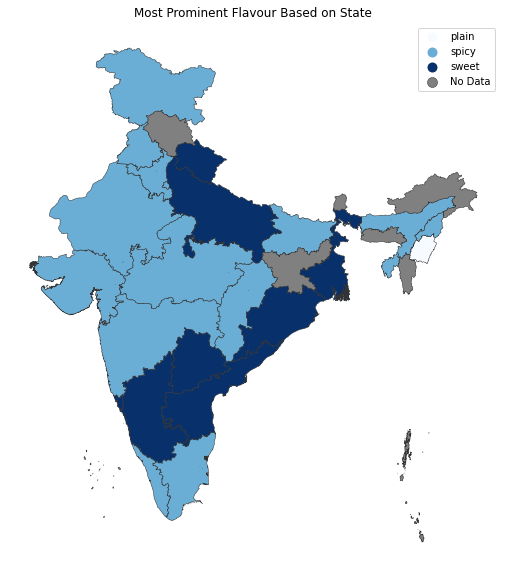

In [34]:
ind_map = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
map_w_data = ind_map.set_index('st_nm').join(flavors_of_state)
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title('Most Prominent Flavour Based on State')
ax.axis('off')
fig = map_w_data.plot(column='max', cmap='Blues', categorical=True, linewidth=0.5, ax=ax, edgecolor='0.2',legend=True, missing_kwds=dict(color='grey', label='No Data'))

Seems like majority of the states deal mostly in sweet and spicy meals!

**Let us do the same exploration on regions rather than states.**

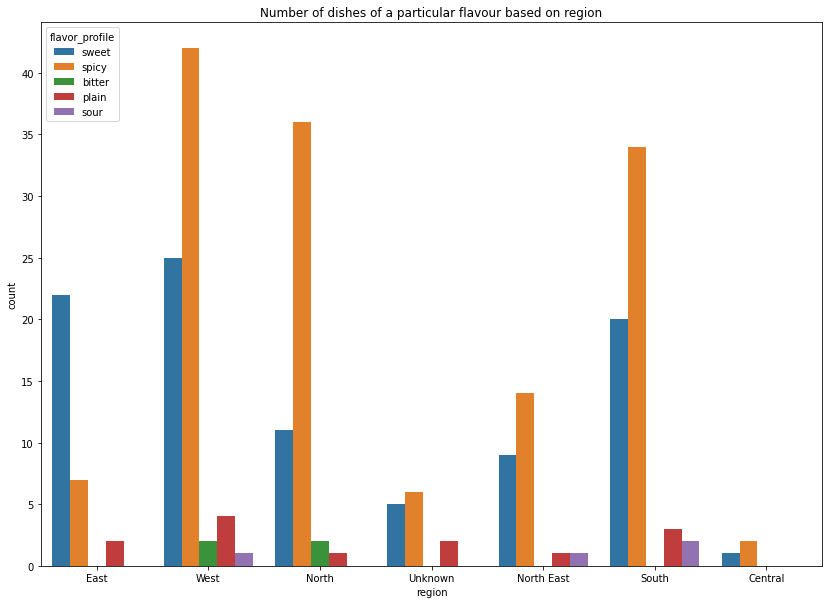

In [35]:
fig, ax = plt.subplots(1, figsize=(14, 10))
ax.set_title('Number of dishes of a particular flavour based on region')
plot = sns.countplot(x=df['region'], hue=df['flavor_profile'])


Spicy food seems to be winning all around the country except in East, mostly thanks to West Bengal and their plethora of desserts!

Just like the exploration of veg and non-veg dishes, **let us look at the preparation and cooking time of dishes based on their flavour profiles.**

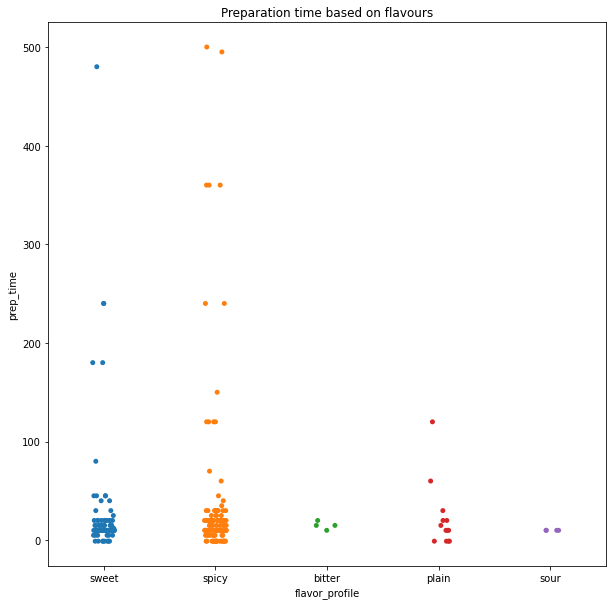

In [36]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Preparation time based on flavours')
plot = sns.stripplot(data=df, x='flavor_profile', y='prep_time')


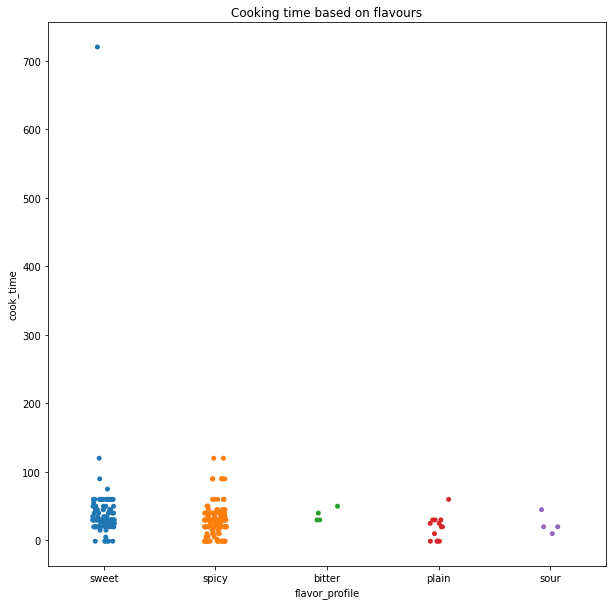

In [37]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Cooking time based on flavours')
plot = sns.stripplot(data=df, x='flavor_profile', y='cook_time')


Nothing seems out of the ordinary in the graphs (except of course, the almighty Shrikhand, sitting on top of the cooking time in all of its glory).

**Let's now look at the preferred course of dishes of every state.**

In [38]:
courses_of_state = pd.crosstab(df['state'],df['course'])
courses_of_state['max'] = courses_of_state.idxmax(axis=1)
courses_of_state.drop(columns=['dessert','main course','snack','starter'], inplace=True)
courses_of_state

course,max
state,
Andhra Pradesh,dessert
Assam,main course
Bihar,main course
Chhattisgarh,snack
Goa,dessert
Gujarat,snack
Haryana,main course
Jammu & Kashmir,dessert
Karnataka,main course


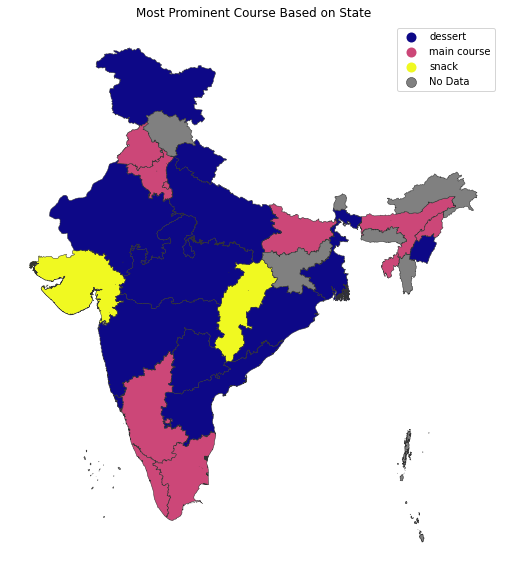

In [39]:
ind_map = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
map_w_data = ind_map.set_index('st_nm').join(courses_of_state)
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title('Most Prominent Course Based on State')
ax.axis('off')
fig = map_w_data.plot(column='max', cmap='plasma', categorical=True, linewidth=0.5, ax=ax, edgecolor='0.2',legend=True, missing_kwds=dict(color='grey', label='No Data'))

Even though spicy food was winning over sweet food in most states, dessert seems to be the favorite in this case. This difference is because of the fact that most if not all sweet food go into the desserts category whereas the spicy food can be distributed pretty evenly between snacks, starters and main course.

**Let us now instead look at the count of every single course of every single state.**

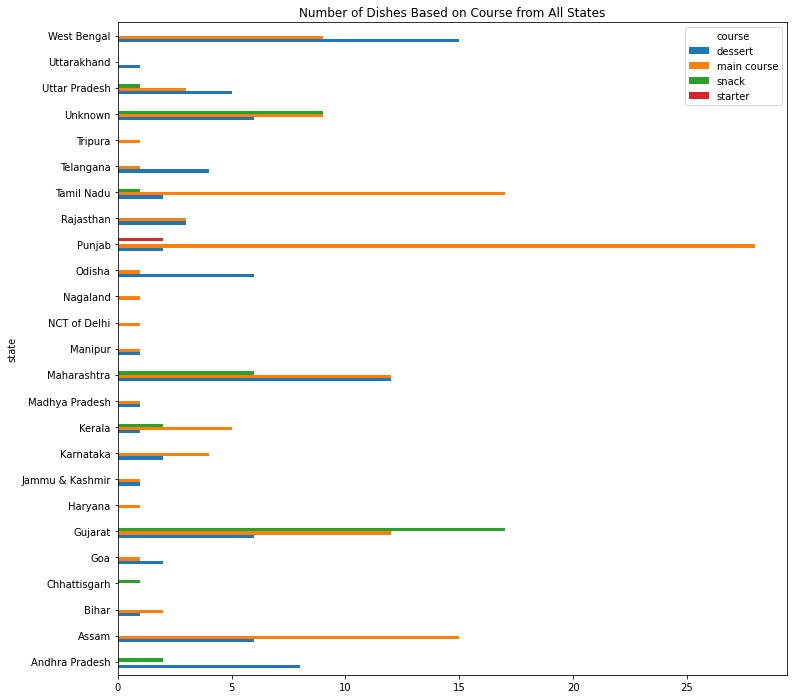

In [40]:
pd.crosstab(df['state'],df['course']).plot(kind="barh",figsize=(12,12))
plt.title("Number of Dishes Based on Course from All States")
plt.show()

We can see that Punjab is the only contributer to the starters category. Morever, Gujarat is the leader of snacks whereas West Bengal is the leader of desserts.

Now that we've looked into the course category based on states, **let's also look at it from a regional perspective.**

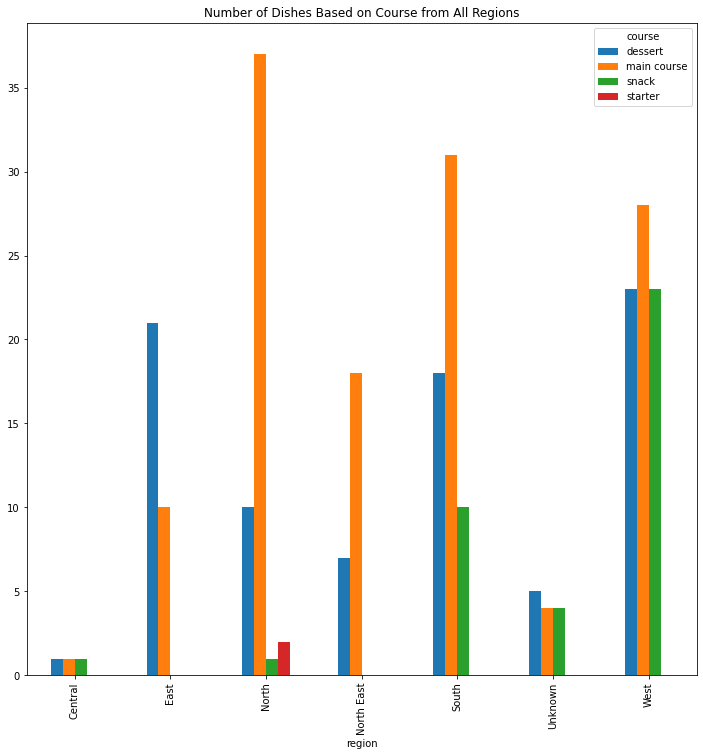

In [41]:
pd.crosstab(df['region'],df['course']).plot(kind="bar",figsize=(12,12))
plt.title("Number of Dishes Based on Course from All Regions")
plt.show()

We can observe that west as a whole is the leader of both snacks and desserts. Moreoever, north is the only source of starters in the dataset (that too, solely due to Punjab as we have already seen).

**Now we compare the preparation and cooking times of food items based on their course.**

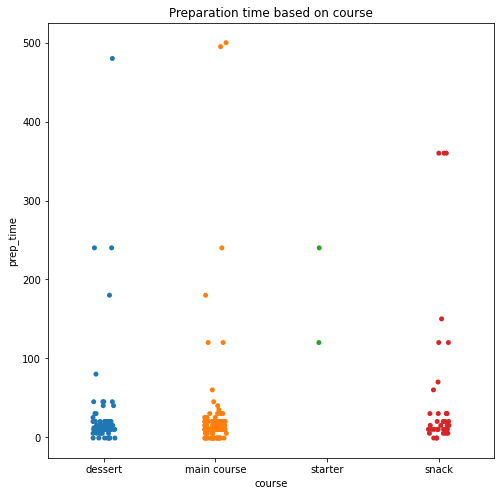

In [42]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.set_title('Preparation time based on course')
plot = sns.stripplot(data=df, x='course', y='prep_time')


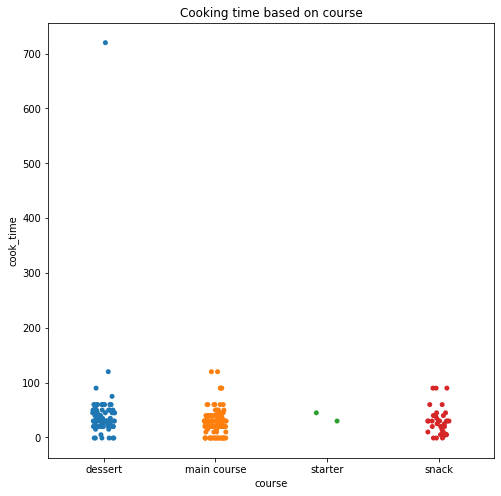

In [43]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.set_title('Cooking time based on course')
plot = sns.stripplot(data=df, x='course', y='cook_time')


We can see that the two starters present in the dataset seem to be taking a long time to prepare. Let us look at what those two starters really are.

In [44]:
df.loc[df['course'] == 'starter']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
81,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam ...",non vegetarian,120,45,spicy,starter,Punjab,North
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240,30,spicy,starter,Punjab,North


There is one column of the dataset we have completely avoided until now, which is the ingredients column. So now, **let's explore that through word clouds!**

**Firstly, let's make a word cloud of all the ingredients.**

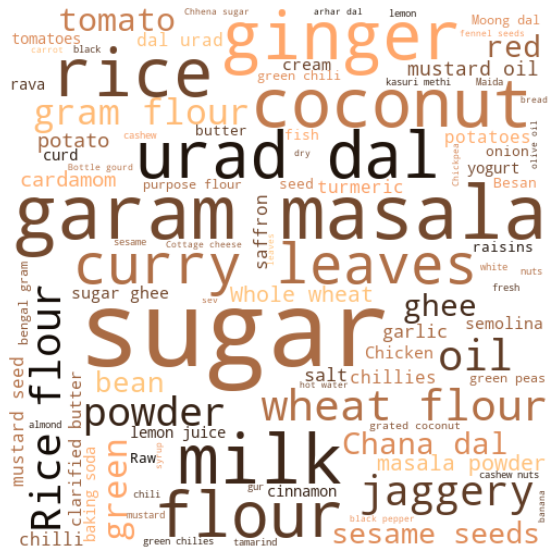

In [45]:
ingredient_list = []
text=''
series_ing = df['ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                  
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()

Looks pretty good! Although it seems like the dessert ingredients are dominating the word cloud. So just for the sake of it, **let's look at the ingredient word cloud without the desserts.**

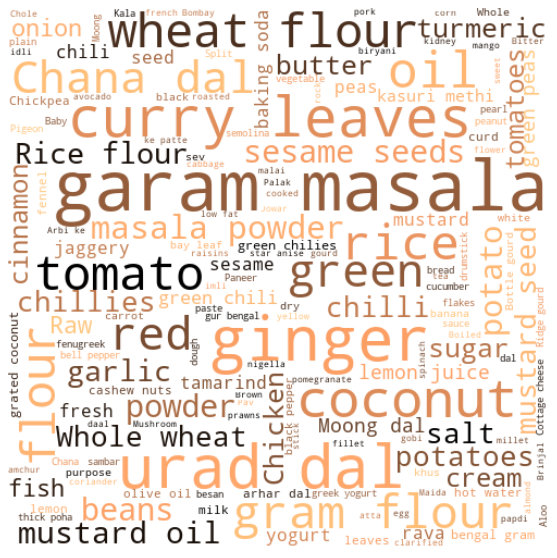

In [46]:
ingredient_list = []
text=''
series_ing = df.loc[df['course']!='dessert', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white',min_font_size = 8).generate(text)                  
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


Garam Masala, Curry Leaves, Coconut, Ginger, Urad Dal and Chana Dal seem to be the favourites!

**Lastly, let's create word clouds out of the ingredients of every single region.**

## Southern Ingredients Word Cloud

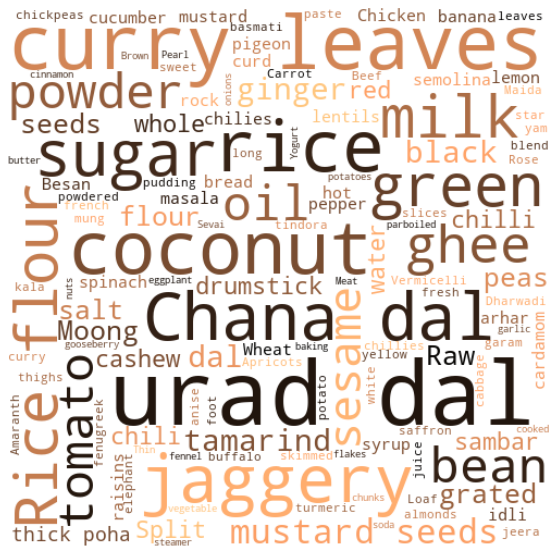

In [47]:
ingredient_list = []
text=''
series_ing = df.loc[df['region']=='South', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                                  
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


## Northern Ingredients Word Cloud

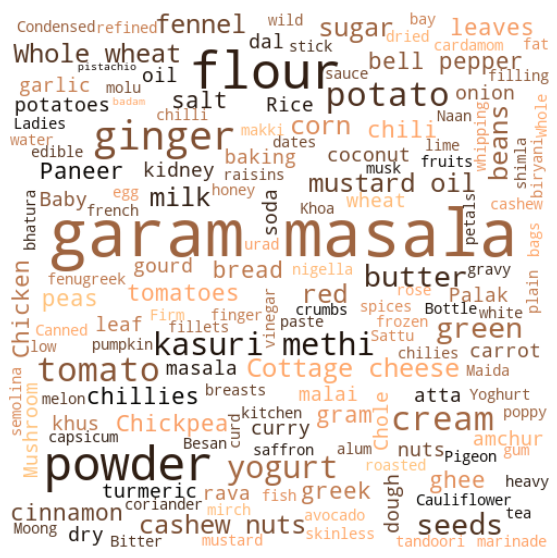

In [48]:
ingredient_list = []
text=''
series_ing = df.loc[df['region']=='North', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                                                 
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


## Western Ingredients Word Cloud

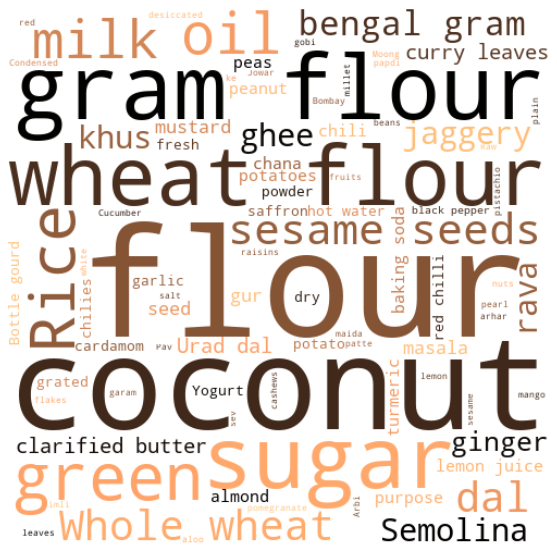

In [49]:
ingredient_list = []
text=''
series_ing = df.loc[df['region']=='West', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                                                 
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


## Eastern Ingredients Word Cloud

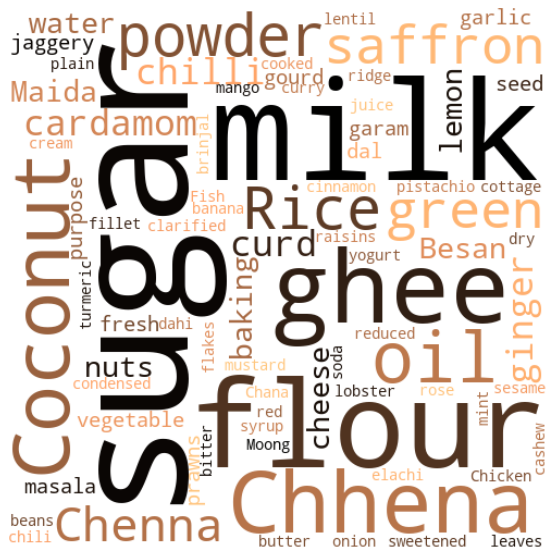

In [50]:
ingredient_list = []
text=''
series_ing = df.loc[df['region']=='East', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                                                 
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


## North-Eastern Ingredients Word Cloud

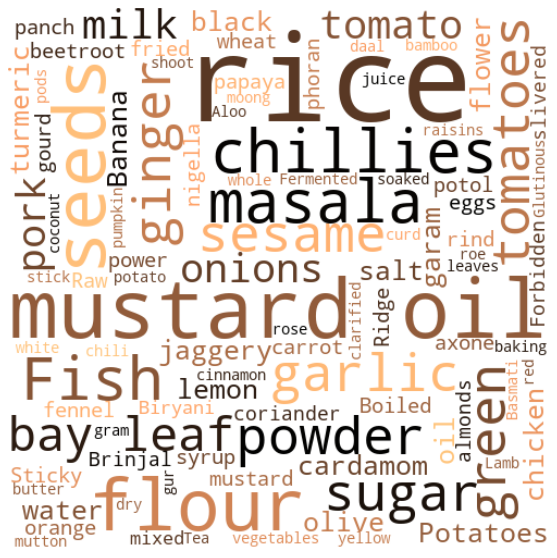

In [51]:
ingredient_list = []
text=''
series_ing = df.loc[df['region']=='North East', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                                                 
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


## Central Ingredients Word Cloud

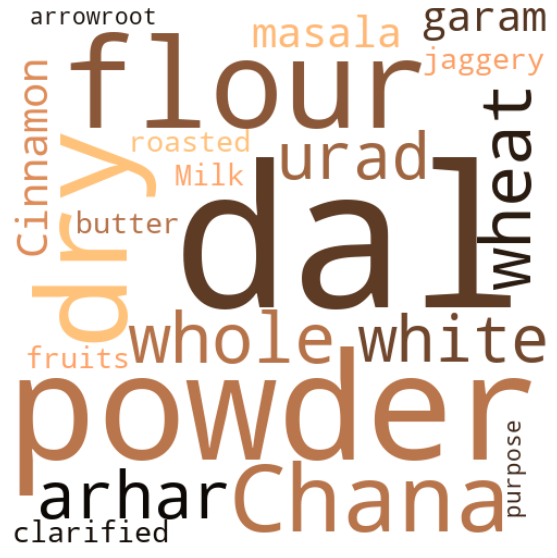

In [52]:
ingredient_list = []
text=''
series_ing = df.loc[df['region']=='Central', 'ingredients'].apply(lambda x: x.split(', '))
for x in series_ing:
    ingredient_list.extend(x)
    
text = ', '.join(ingredient_list)
wordcloud = WordCloud(width = 500, height = 500, colormap = 'copper',background_color ='white', min_font_size = 8).generate(text)                                                 
plt.figure(figsize = (10, 10)) 
plt.axis('off') 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.show()


## Thank you!

This was my first EDA notebook that I ever worked on. Criticism and feedback are welcome :)